# Anime Recommendation system - EDA

In [329]:
import numpy as np
import pandas as pd
#release files
import zipfile
with zipfile.ZipFile("Data/anime.zip","r") as zip_ref:
    zip_ref.extractall("Data")

## Dataset General Information

In [330]:
anime_df = pd.read_csv("Data/anime.csv")
rating_df = pd.read_csv("Data/rating.csv")
print(f"size of Data Frames:\n\tanime: {anime_df.shape}\n\trating: {rating_df.shape}")

size of Data Frames:
	anime: (12294, 7)
	rating: (7813737, 3)


In [331]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [332]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [333]:
anime_df.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [334]:
rating_df.head(3)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1


In [335]:
n_users = rating_df.user_id.unique().shape[0]
n_anime = anime_df.anime_id.unique().shape[0]
print(f"Number of anime in the data: {n_users}\nNumber of users in the data: {n_anime}")

Number of anime in the data: 73515
Number of users in the data: 12294


## Univariate analysis

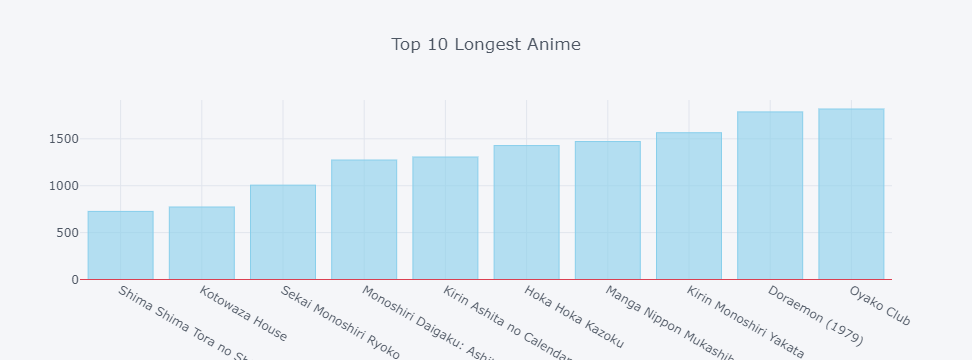

In [336]:
import cufflinks as cf; cf.go_offline()
import matplotlib.pyplot as plt
top_episodes = anime_df.episodes.replace("Unknown", np.nan).astype("float64").sort_values(ascending = False)[:10].tolist()
top_episodes_anime = anime_df.loc[anime_df.episodes.replace("Unknown", np.nan).astype("float64").sort_values(ascending = False)[:10].index]["name"].tolist()
top_ep_an = pd.DataFrame({"episodes":top_episodes[::-1]},index = top_episodes_anime[::-1])
top_ep_an.iplot(kind='bar', title = 'Top 10 Longest Anime', hline=(0), color = ['skyblue'])

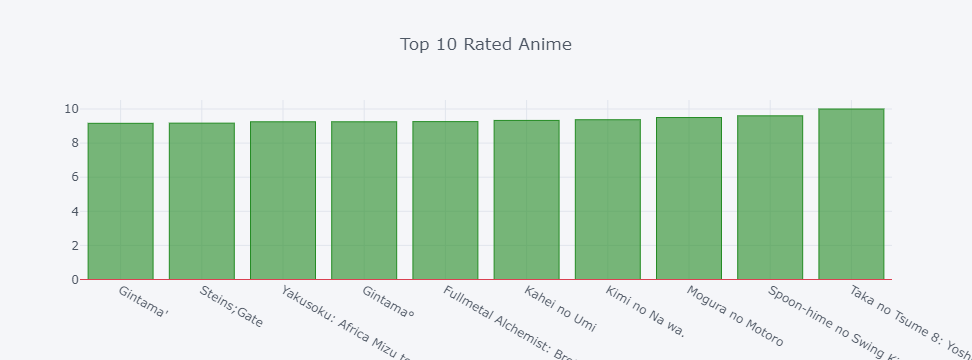

In [337]:
top_rated = anime_df.rating.replace("Unknown", np.nan).astype("float64").sort_values(ascending = False)[:10].tolist()
top_rated_anime = anime_df.loc[anime_df.rating.replace("Unknown", np.nan).astype("float64").sort_values(ascending = False)[:10].index]["name"].tolist()
top_r_an = pd.DataFrame({"ratings":top_rated[::-1]},index = top_rated_anime[::-1])
top_r_an.iplot(kind='bar', title = 'Top 10 Rated Anime', hline=(0), color = ['forestgreen'])

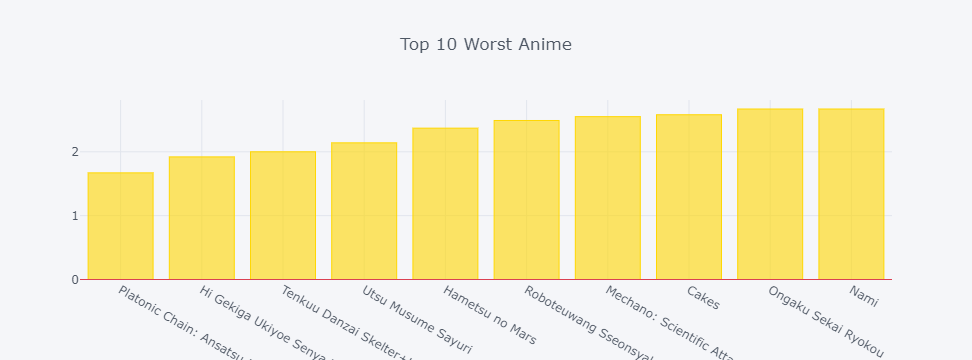

In [338]:
worst_rated = anime_df.rating.replace("Unknown", np.nan).astype("float64").sort_values(ascending = True)[:10].tolist()
worst_rated_anime = anime_df.loc[anime_df.rating.replace("Unknown", np.nan).astype("float64").sort_values(ascending = True)[:10].index]["name"].tolist()
worst_r_an = pd.DataFrame({"ratings":worst_rated},index = worst_rated_anime)
worst_r_an.iplot(kind='bar', title = 'Top 10 Worst Anime', hline=(0), color = ['gold'])

In [339]:
anime_df.rating.describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [340]:
from collections import Counter
genres = [genre.split(",") for genre in anime_df["genre"].replace(np.nan,"Unknown").tolist()]
genres = [item for sublist in genres for item in sublist]
genres = Counter(genres)
dictionary = {"genres": [key for key in genres.keys()], "counts":[value for value in genres.values()]}
df = pd.DataFrame(dictionary)

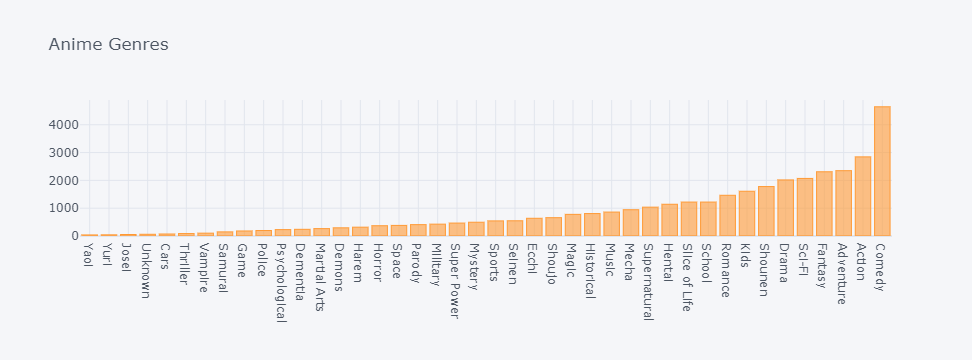

In [341]:
df.genres = df.genres.apply(lambda g: g[1:] if g.startswith(" ") else g)
df.genres.replace(["Shounen Ai","Shoujo Ai"],["Shounen","Shoujo"],inplace = True)
df.groupby('genres')['counts'].sum().sort_values().iplot(kind = "bar",title = "Anime Genres")

In [342]:
print("10 Least Frequent Genres:")
df.groupby('genres')['counts'].sum().sort_values()[:10]

10 Least Frequent Genres:


genres
Yaoi         39
Yuri         42
Josei        54
Unknown      62
Cars         72
Thriller     87
Vampire     102
Samurai     148
Game        181
Police      197
Name: counts, dtype: int64

In [343]:
print("10 Most Frequent Genres:")
df.groupby('genres')['counts'].sum().sort_values(ascending = False)[:10]

10 Most Frequent Genres:


genres
Comedy           4645
Action           2845
Adventure        2348
Fantasy          2309
Sci-Fi           2070
Drama            2016
Shounen          1777
Kids             1609
Romance          1464
Slice of Life    1220
Name: counts, dtype: int64

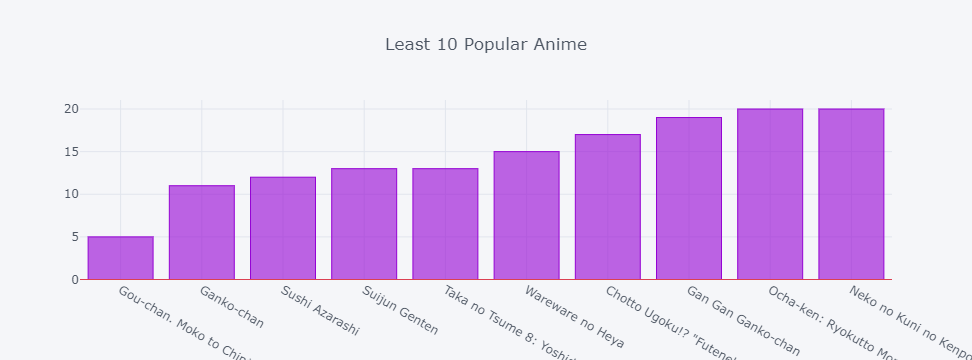

In [344]:
least_popular = anime_df.loc[anime_df["members"].sort_values()[:10].index].members.tolist()
least_popular_anime = anime_df.loc[anime_df["members"].sort_values()[:10].index].name.tolist()
least_p_an = pd.DataFrame({"ratings":least_popular},index = least_popular_anime)
least_p_an.iplot(kind='bar', title = 'Least 10 Popular Anime', hline=(0), color = ['darkviolet'])

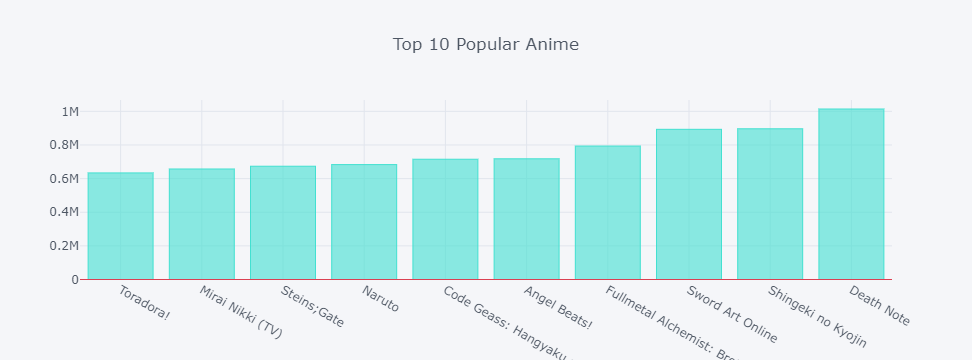

In [345]:
least_popular = anime_df.loc[anime_df["members"].sort_values(ascending = False)[:10].index].members.tolist()
least_popular_anime = anime_df.loc[anime_df["members"].sort_values(ascending = False)[:10].index].name.tolist()
least_p_an = pd.DataFrame({"ratings":least_popular[::-1]},index = least_popular_anime[::-1])
least_p_an.iplot(kind='bar', title = 'Top 10 Popular Anime', hline=(0), color = ['turquoise'])

## Multivariate analysis

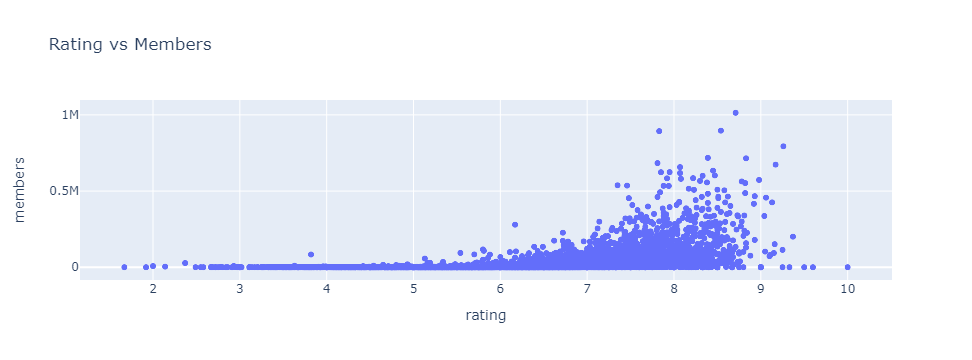

In [346]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(anime_df, x="rating", y="members", title = "Rating vs Members")
fig.show()

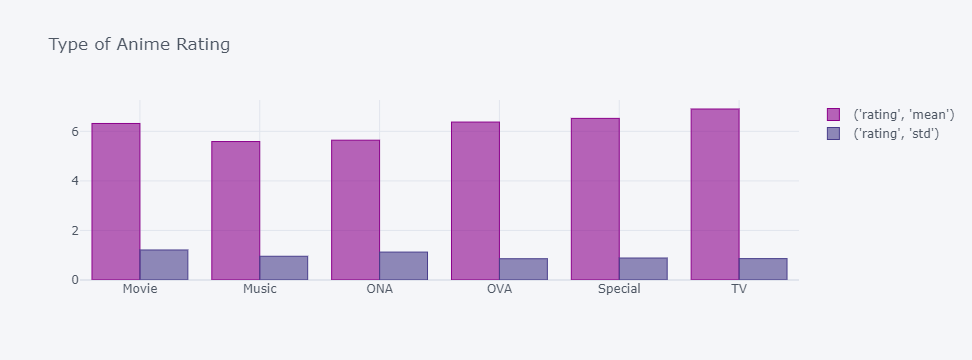

In [347]:
anime_df.groupby(by = "type").agg([np.mean,np.std])[["rating"]].iplot(kind = "bar", title = "Type of Anime Rating", color = ["DarkMagenta","DarkSlateBlue"])